# Relations distribution

In [1]:
import collections

FILE = '../Data/train_subtask2_2.tsv'

In [ ]:
# {doc_id: {'LivingStatus': [(fm, 0-4)],
#           'Observation': [(fm, disease)]
#          }
# }
relations = collections.defaultdict(dict)
neg_obs = 0
non_neg_obs = 0
with open(FILE, 'r') as f:
    for line in f.readlines():
        line = line.strip('\n').split('\t')
        if line[3] == "Observation":
            doc_id, fm, _, relation, content, negated = line
            relations[doc_id][relation] = relations.get(doc_id, {}).get(relation, []) \
                                          + [(fm, content)]
            if negated == "Negated":
                neg_obs += 1
            else:
                non_neg_obs += 1
        elif line[3] == "LivingStatus":
            doc_id, fm, _, relation, content = line
            relations[doc_id][relation] = relations.get(doc_id, {}).get(relation, []) \
                                          + [(fm, content)]
        
for doc_id in relations:
    print(relations[doc_id], '\n')

In [3]:
print("neg_obs:", neg_obs, "non_neg_obs:", non_neg_obs)

neg_obs: 57 non_neg_obs: 683


In [4]:
from collections import Counter
obs_nums = {} # {obs_number_in_a_file: frequency_of_this_number}
for doc_id in relations:
    obs_count = len(relations.get(doc_id).get('Observation', []))
    obs_nums[obs_count] = obs_nums.get(obs_count, 0) + 1
print(obs_nums)

total_obs_relation_num, total_doc_num = 0, 0
for num_of_rela, freq in obs_nums.items():
    total_obs_relation_num += num_of_rela * freq
    total_doc_num += freq
print('The total number of relationship in all docs is:', total_obs_relation_num)
print('The avg number of relationship in all docs is:', total_obs_relation_num/total_doc_num)

{9: 6, 1: 8, 7: 5, 4: 8, 19: 1, 10: 4, 3: 10, 11: 8, 2: 8, 14: 4, 5: 8, 0: 4, 12: 3, 8: 4, 16: 1, 17: 3, 20: 1, 6: 3, 15: 4, 18: 2, 13: 2, 27: 1}
The total number of relationship in all docs is: 740
The avg number of relationship in all docs is: 7.551020408163265


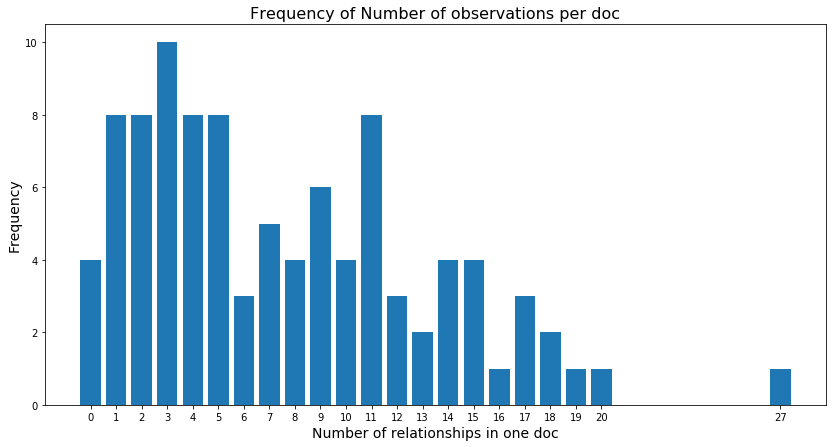

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(14,7))
plt.bar(list(obs_nums.keys()), list(obs_nums.values()), tick_label=list(obs_nums.keys()))
plt.title('Frequency of Number of observations per doc', fontsize=16)
plt.xlabel('Number of relationships in one doc', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

# Distance of entities in relations

In [6]:
import pickle as pkl
from os.path import join

DIR = '../objects'

with open(join(DIR, 'train_sents.pkl'), 'rb') as pkl_f:
    sents = pkl.load(pkl_f)

In [7]:
def get_sent_id_of_ent(sents, ent):
    ids = []
    for i in range(len(sents)):
        if ent in sents[i]:
            ids.append(i)
    return ids

def min_dist_of_lists(l1, l2):
    dists = [abs(d1 - d2) for d1 in l1 for d2 in l2]
    return min(dists) if dists else -1

obs_dist_freqs = {} # {dist: freq}
for doc_id, doc_relations in relations.items():
    doc_sents = list(map(lambda sent: sent.lower(), sents[doc_id]))
    
    for relation in doc_relations.get('Observation', []):
        fm_sent_ids = get_sent_id_of_ent(doc_sents, relation[0].lower())
        obs_sent_ids = get_sent_id_of_ent(doc_sents, relation[1].lower())
        dist = min_dist_of_lists(fm_sent_ids, obs_sent_ids)
        obs_dist_freqs[dist] = obs_dist_freqs.get(dist, 0) + 1
        
print(obs_dist_freqs)

{0: 523, 1: 110, 2: 33, 3: 22, -1: 47, 6: 2, 7: 2, 5: 1}


70.67567567567568%
523 out of 740 relations are inside one sentence.


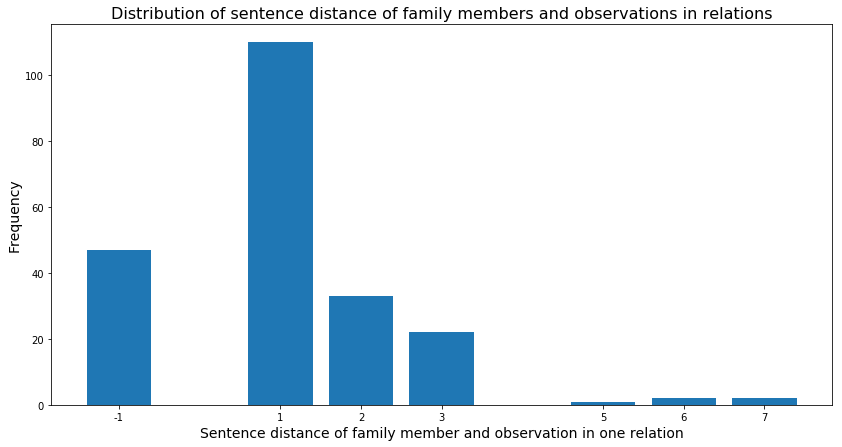

In [8]:
print(str(obs_dist_freqs[0] / total_obs_relation_num * 100) + "%")
print(str(obs_dist_freqs[0]) + " out of " + str(total_obs_relation_num) + " relations are inside one sentence.")
plt.figure(figsize=(14,7))
dist_of_relation_not_in_a_sent = obs_dist_freqs.pop(0)
plt.bar(list(obs_dist_freqs.keys()), list(obs_dist_freqs.values()), tick_label=list(obs_dist_freqs.keys()))
plt.title('Distribution of sentence distance of family members and observations in relations', fontsize=16)
plt.xlabel('Sentence distance of family member and observation in one relation', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

| in one sentence | adjacent sentences | one sent in between | two sents in between | total |
|----|:---:|:---:|:---:|:---:|
|522(70.64%) | (110)14.88% | (33)4.47% | (22)2.98% | (687)92.96% |

There are also 40/739 = 6.36% relationships can't directly find from original texts.

# Living Status

In [9]:
ls_nums = 0 # {obs_number_in_a_file: frequency_of_this_number}
for doc_id in relations:
    ls_nums += len(relations.get(doc_id).get('LivingStatus', []))

print(ls_nums)

376
